In [ ]:
import torch.nn as nn
model = nn.Sequential(
                nn.Conv2d(1, 20, 5),
                nn.ReLU(),
                nn.Conv2d(20, 64, 5),
                nn.ReLU()
            )

model


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 64, 5)
        
    def foward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2)
    
model = Model()
model

In [47]:
import torch
x = torch.randn(4)
y = torch.randn(4)

criterion = nn.MSELoss()
loss = criterion(x, y)
print(loss)

tensor(8.7578)


In [ ]:
num_classes = 10
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(32 , 600)
        self.fc2 = nn.Linear(600, 600)
        self.fc3 = nn.Linear(600, num_classes)
        self.dropout1 = nn.Dropout2d(0.2)
        self.dropout2 = nn.Dropout2d(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return F.relu(self.fc3(x))
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MLPNet().to(device)
images, labels = images.to(device), labels.to(device)
MLPNet()
net(images)

In [97]:
import torchvision.transforms as transforms
import torchvision
train_dataset = torchvision.datasets.CIFAR10(root='./data/', train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                           transform=transforms.ToTensor(),
                                           download=True)
image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [98]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=64,
                                         shuffle=False,
                                         num_workers=2)

In [99]:
x = torch.randn(1, 4)
y = torch.LongTensor([1]).random_(4)
criterion = nn.CrossEntropyLoss()
loss = criterion(x, y)
print(loss)

tensor(0.9479)


In [100]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.line = nn.Linear(in_features=10, out_features=10, bias=False)
        
    def forward(self, x):
        x = self.line(x)
        return x

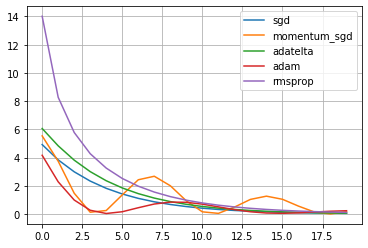

In [101]:
import torch
from torch import optim
import matplotlib.pyplot as plt

def main(opt_conf):
    loss_list = []
    x = torch.randn(1, 10)
    w = torch.randn(1, 1)
    y = torch.mul(w, x) + 2
    
    net = Net()
    
    criterion = nn.MSELoss()
    
    if opt_conf == "sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1)
    elif opt_conf == "momentum_sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
    elif opt_conf == "adadelta":
        optimizer = optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
    elif opt_conf == "adagrad":
        optimizer = optim.Adagrad(net.parameters())
    elif opt_conf =="adam":
        optimizer = optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
    elif opt_conf == "rmsprop":
        optimizer = optim.RMSprop(net.parameters())
    for epoch in range(20):
        optimizer.zero_grad()
        y_pred = net(x)
        
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data.item())
    return loss_list

loss_dict = {}
loss_dict["sgd"] = []
loss_dict["momentum_sgd"] = []
loss_dict["adadelta"] = []
loss_dict["adam"] = []
loss_dict["rmsprop"] = []
    
for key, value in loss_dict.items():
    loss_dict[key] = main(key)
    
plt.figure()
plt.plot(loss_dict["sgd"], label='sgd')
plt.plot(loss_dict["momentum_sgd"], label='momentum_sgd')
plt.plot(loss_dict["adadelta"], label='adatelta')
plt.plot(loss_dict["adam"], label='adam')
plt.plot(loss_dict["rmsprop"], label='rmsprop')
plt.legend()
plt.grid()

In [118]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Linear(256, num_classes)
        
        def forward(self, x):
            x = self.features(x)
            x = x.view(x.size(0), -1)
            x = self.classifier(x)
            return x
device ='cuda' if torch.cuda.is_available() else 'cpu' 
net = AlexNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9,
                     weight_decay=5e-4)

net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Linear(in_features=256, out_features=10, bias=True)
)

In [122]:
AlexNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [ ]:
num_epochs = 20

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    net.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc *= (outputs.max(1)[1] == labels).sum().item()
        loss.backward()
        optimizer.step()
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
        avg_val_loss = val_loss / len(test_loader.dataset)
        avg_val_acc = val_acc / len(test_loader.dataset)
        print('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'
             .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc =avg_val_acc))
        train_loss_list.append(avg_train_loss)
        train_acc_list.append(avg_train_acc)
        val_loss_list.append(avg_val_loss)
        val_acc_list.append(avg_val_acc)
        
    
    

In [ ]:
import datetime

dt = datetime.datetime.now()
print(dt)

In [ ]:
net(images)

In [127]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [128]:
num_classes = 10

class AlexNet(nn.Module):

    def __init__(self, num_classes):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = AlexNet(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.firgure()
plt.plot(range(num_epochs), train_loss_list, color='blue',
        linestyle='-', label = 'train_loss')
plt.plot(range(num_epochs), val_loss_list, color='red',
        linestyle='-', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid()

plt.firgure()
plt.plot(range(num_epochs), train_acc_list, color='blue',
        linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='red',
        linestyle='-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and Validation accurancy')
plt.grid()